In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/guren/Desktop/res/Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.shape

(200, 5)

In [8]:
data['Annual Income (k$)'].value_counts()

54     12
78     12
60      6
87      6
62      6
63      6
71      6
48      6
33      4
19      4
39      4
40      4
103     4
73      4
43      4
65      4
77      4
46      4
28      4
20      4
88      4
67      4
44      2
42      2
47      2
17      2
16      2
21      2
38      2
23      2
       ..
29      2
25      2
24      2
18      2
137     2
50      2
79      2
120     2
113     2
101     2
99      2
98      2
97      2
93      2
86      2
85      2
81      2
76      2
57      2
75      2
74      2
72      2
70      2
69      2
64      2
61      2
126     2
59      2
58      2
15      2
Name: Annual Income (k$), Length: 64, dtype: int64

In [9]:
from sklearn.cluster import KMeans

In [10]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
X=data.iloc[:,[3,4]].values

In [12]:
KMeans=KMeans(n_clusters=5,random_state=42)

In [13]:
KMeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [14]:
KMeans.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

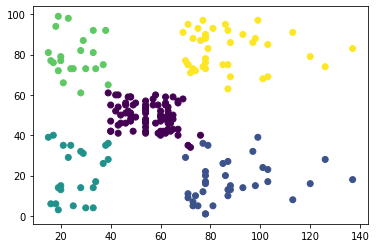

In [15]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c = KMeans.labels_, cmap = 'viridis')

In [18]:
from sklearn.cluster import KMeans

In [19]:
SSE = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    print(kmeans.inertia_)

269981.28
181363.59595959596
106348.37306211118
73679.78903948834
44448.45544793371
37233.81451071001
30259.65720728547
25011.83934915659
21850.165282585633


Text(0, 0.5, 'SEE')

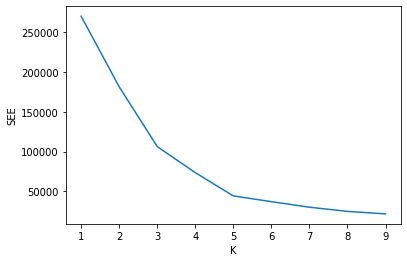

In [20]:
plt.plot(index, SSE)
plt.xlabel('K')
plt.ylabel('SEE')